# DSCI 552 | Homework 7

## Anuran Calls (MFCCs) Data

| Key             | Value           |
| --------------- | --------------- |
| Submitted By    | Ruchit Bhardwaj |
| USC ID          | 1111-4177-99    |
| Github Username | ruch0401        |


### 1. Multi-class and Multi-Label Classification Using Support Vector Machines

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import hamming_loss
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings("ignore")

**1(a). Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.**

In [2]:
mfcc_data = "../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv"
mfcc_data = pd.read_csv(mfcc_data)
mfcc_data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [3]:
from sklearn.model_selection import train_test_split
family = mfcc_data['Family']
genus = mfcc_data['Genus']
species = mfcc_data['Species']

In [4]:
import random
num_row = len(mfcc_data)
random.seed(num_row)

r = range(num_row)
los = int(num_row * 0.7)
train_idx = random.sample(r, los)

test_idx = []
for i in range(num_row):
    if i not in train_idx:
        test_idx.append(i)

# split train and test
mfcc_train = mfcc_data.iloc[train_idx, :].reset_index(drop=True)
mfcc_test = mfcc_data.iloc[test_idx, :].reset_index(drop=True)

# split train features and labels
train_x = mfcc_train.iloc[:, :-4]
train_family = mfcc_train['Family']
train_genus = mfcc_train['Genus']
train_species = mfcc_train['Species']

# split test features and labels
test_x = mfcc_test.iloc[:, :-4]
test_family = mfcc_test['Family']
test_genus = mfcc_test['Genus']
test_species = mfcc_test['Species']

In [5]:
mfcc_train.shape

(5036, 26)

In [6]:
mfcc_test.shape

(2159, 26)

In [7]:
summary = {}

**1(b). Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:**

*1(b)-i. Research exact match and hamming score/ loss methods for evaluating multi-label classification and use them in evaluating the classifiers in this problem.*

**Exact match:** This  means every label of a sample must be exactly the same as its in data set. This is also known as a sample-based accuracy.

**Hamming Loss:**: This is a label-based metric that counts each single miss-matched label rather than consider the lables of a sample as one.

In [8]:
from sklearn.metrics import hamming_loss

def multilableMetric(groundTruthY, predictY):
    # hamming loss
    missclf_labels = 0
    for truth, pred in zip(groundTruthY.values, predictY.values):
        miss = (truth != pred)
        missclf_labels += np.sum(miss)
    hamming = missclf_labels / (groundTruthY.shape[0] * groundTruthY.shape[1])
    
    # exact math ratio
    exact_ratio = 0
    for truth, pred in zip(groundTruthY.values, predictY.values):
        match = (truth == pred)
        if sum(match) == groundTruthY.shape[1]:
            exact_ratio += 1;
    exact_ratio /= groundTruthY.shape[0]
    
    hamming = np.round(hamming, 4)
    exact_ratio = np.round(exact_ratio, 4)
    
    ans = {
        "Hamming Loss": [hamming],
        "Exact Match Ratio": [exact_ratio]
    }
    print(pd.DataFrame(data=ans))
    return hamming, exact_ratio

def multilabelEval(title, testX, groundTruthY, classifiers):
    predictY = pd.DataFrame(columns=groundTruthY.columns)
    for label in groundTruthY.columns:
        clf = classifiers[label]
        test_pred = clf.predict(testX)
        predictY.loc[:, label] = test_pred
    print(f"Multilabel evaluation of {title}")
    hamming, exact_ratio = multilableMetric(groundTruthY, predictY)
    return [hamming, exact_ratio]

*1(b)-ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try
to solve the problem with both standardized and raw attributes and report the results.*

In [9]:
def paramSearch(classifier, kwargs, trainX, trainY, testX, testY):
    # build and fit the grid search for given classifier
    clf = GridSearchCV(estimator=classifier, **kwargs)
    clf.fit(trainX, trainY)
    
    print("Grid scores on development set:\n")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print(f"{round(mean, 3)} (+/-{round(std * 2, 3)}) for {params}")
    
    # output the best option
    print("\nThe best parameter setting is:")
    print(clf.best_params_, "\n")
    
    # evaluation on single-label task
    test_pred = clf.predict(testX)
    print(classification_report(testY, test_pred))
    return clf

In [10]:
# Gaussian SVC without standardization

gaussianSVC_classifiers = {}
tuned_params = {'C' : np.logspace(1, 4, 4), 
                'gamma' : np.logspace(-3, 6, 10)}
splitter = StratifiedKFold(10, random_state=5036, shuffle=True)
kwargs = {
    'param_grid' : tuned_params, 
    'cv' : splitter,
    'scoring' : 'f1_weighted', 
    'verbose' : 1
}

In [11]:
print(f"Class: Family (Gaussian SVC without Standardization)")
gaussianSVC_classifiers['Family'] = paramSearch(SVC(kernel='rbf'), 
                                                kwargs, 
                                                train_x, 
                                                train_family, 
                                                test_x, 
                                                test_family)

Class: Family (Gaussian SVC without Standardization)
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Grid scores on development set:

0.869 (+/-0.019) for {'C': 10.0, 'gamma': 0.001}
0.926 (+/-0.016) for {'C': 10.0, 'gamma': 0.01}
0.971 (+/-0.012) for {'C': 10.0, 'gamma': 0.1}
0.991 (+/-0.007) for {'C': 10.0, 'gamma': 1.0}
0.986 (+/-0.01) for {'C': 10.0, 'gamma': 10.0}
0.791 (+/-0.04) for {'C': 10.0, 'gamma': 100.0}
0.492 (+/-0.021) for {'C': 10.0, 'gamma': 1000.0}
0.472 (+/-0.005) for {'C': 10.0, 'gamma': 10000.0}
0.47 (+/-0.002) for {'C': 10.0, 'gamma': 100000.0}
0.47 (+/-0.002) for {'C': 10.0, 'gamma': 1000000.0}
0.925 (+/-0.016) for {'C': 100.0, 'gamma': 0.001}
0.94 (+/-0.02) for {'C': 100.0, 'gamma': 0.01}
0.982 (+/-0.007) for {'C': 100.0, 'gamma': 0.1}
0.992 (+/-0.008) for {'C': 100.0, 'gamma': 1.0}
0.986 (+/-0.01) for {'C': 100.0, 'gamma': 10.0}
0.791 (+/-0.04) for {'C': 100.0, 'gamma': 100.0}
0.492 (+/-0.021) for {'C': 100.0, 'gamma': 1000.0}
0.472 (+/-0.005) for

In [12]:
print(f"Class: Genus (Gaussian SVC without Standardization)")
gaussianSVC_classifiers['Genus'] = paramSearch(SVC(kernel='rbf'), 
                                                kwargs, 
                                                train_x, 
                                                train_genus, 
                                                test_x, 
                                                test_genus)

Class: Genus (Gaussian SVC without Standardization)
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Grid scores on development set:

0.744 (+/-0.026) for {'C': 10.0, 'gamma': 0.001}
0.92 (+/-0.019) for {'C': 10.0, 'gamma': 0.01}
0.973 (+/-0.014) for {'C': 10.0, 'gamma': 0.1}
0.988 (+/-0.009) for {'C': 10.0, 'gamma': 1.0}
0.98 (+/-0.011) for {'C': 10.0, 'gamma': 10.0}
0.733 (+/-0.042) for {'C': 10.0, 'gamma': 100.0}
0.442 (+/-0.014) for {'C': 10.0, 'gamma': 1000.0}
0.425 (+/-0.004) for {'C': 10.0, 'gamma': 10000.0}
0.423 (+/-0.001) for {'C': 10.0, 'gamma': 100000.0}
0.423 (+/-0.001) for {'C': 10.0, 'gamma': 1000000.0}
0.919 (+/-0.017) for {'C': 100.0, 'gamma': 0.001}
0.965 (+/-0.016) for {'C': 100.0, 'gamma': 0.01}
0.985 (+/-0.009) for {'C': 100.0, 'gamma': 0.1}
0.989 (+/-0.007) for {'C': 100.0, 'gamma': 1.0}
0.98 (+/-0.011) for {'C': 100.0, 'gamma': 10.0}
0.733 (+/-0.042) for {'C': 100.0, 'gamma': 100.0}
0.442 (+/-0.014) for {'C': 100.0, 'gamma': 1000.0}
0.425 (+/-0.004)

In [13]:
print(f"Class: Species (Gaussian SVC without Standardization)")
gaussianSVC_classifiers['Species'] = paramSearch(SVC(kernel='rbf'), 
                                                kwargs, 
                                                train_x, 
                                                train_species, 
                                                test_x, 
                                                test_species)

Class: Species (Gaussian SVC without Standardization)
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Grid scores on development set:

0.8 (+/-0.015) for {'C': 10.0, 'gamma': 0.001}
0.935 (+/-0.021) for {'C': 10.0, 'gamma': 0.01}
0.974 (+/-0.017) for {'C': 10.0, 'gamma': 0.1}
0.988 (+/-0.011) for {'C': 10.0, 'gamma': 1.0}
0.978 (+/-0.01) for {'C': 10.0, 'gamma': 10.0}
0.656 (+/-0.04) for {'C': 10.0, 'gamma': 100.0}
0.33 (+/-0.015) for {'C': 10.0, 'gamma': 1000.0}
0.314 (+/-0.005) for {'C': 10.0, 'gamma': 10000.0}
0.312 (+/-0.001) for {'C': 10.0, 'gamma': 100000.0}
0.312 (+/-0.001) for {'C': 10.0, 'gamma': 1000000.0}
0.935 (+/-0.021) for {'C': 100.0, 'gamma': 0.001}
0.97 (+/-0.018) for {'C': 100.0, 'gamma': 0.01}
0.985 (+/-0.019) for {'C': 100.0, 'gamma': 0.1}
0.988 (+/-0.011) for {'C': 100.0, 'gamma': 1.0}
0.978 (+/-0.01) for {'C': 100.0, 'gamma': 10.0}
0.656 (+/-0.04) for {'C': 100.0, 'gamma': 100.0}
0.33 (+/-0.015) for {'C': 100.0, 'gamma': 1000.0}
0.314 (+/-0.005) for

In [14]:
title = "Gaussian SVC without Standardization"
summary[title] = multilabelEval(title, test_x, mfcc_test.iloc[:, -4:-1], gaussianSVC_classifiers)

Multilabel evaluation of Gaussian SVC without Standardization
   Hamming Loss  Exact Match Ratio
0        0.0096             0.9852


In [15]:
print("Attempting to standardize the attributes")

std_scaler = StandardScaler()
std_train_x = std_scaler.fit_transform(train_x)
std_test_x = std_scaler.fit_transform(test_x)

Attempting to standardize the attributes


In [16]:
print(f"Class: Family (Gaussian SVC with Standardization)")
gaussianSVC_classifiers['Family'] = paramSearch(SVC(kernel='rbf'), 
                                                kwargs,
                                                std_train_x, 
                                                train_family, 
                                                std_test_x, 
                                                test_family)

Class: Family (Gaussian SVC with Standardization)
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Grid scores on development set:

0.944 (+/-0.02) for {'C': 10.0, 'gamma': 0.001}
0.987 (+/-0.005) for {'C': 10.0, 'gamma': 0.01}
0.99 (+/-0.007) for {'C': 10.0, 'gamma': 0.1}
0.905 (+/-0.023) for {'C': 10.0, 'gamma': 1.0}
0.575 (+/-0.047) for {'C': 10.0, 'gamma': 10.0}
0.473 (+/-0.004) for {'C': 10.0, 'gamma': 100.0}
0.47 (+/-0.002) for {'C': 10.0, 'gamma': 1000.0}
0.47 (+/-0.002) for {'C': 10.0, 'gamma': 10000.0}
0.47 (+/-0.002) for {'C': 10.0, 'gamma': 100000.0}
0.47 (+/-0.002) for {'C': 10.0, 'gamma': 1000000.0}
0.975 (+/-0.013) for {'C': 100.0, 'gamma': 0.001}
0.989 (+/-0.007) for {'C': 100.0, 'gamma': 0.01}
0.99 (+/-0.007) for {'C': 100.0, 'gamma': 0.1}
0.905 (+/-0.023) for {'C': 100.0, 'gamma': 1.0}
0.575 (+/-0.047) for {'C': 100.0, 'gamma': 10.0}
0.473 (+/-0.004) for {'C': 100.0, 'gamma': 100.0}
0.47 (+/-0.002) for {'C': 100.0, 'gamma': 1000.0}
0.47 (+/-0.002) for {'C

In [17]:
print(f"Class: Genus (Gaussian SVC with Standardization)")
gaussianSVC_classifiers['Genus'] = paramSearch(SVC(kernel='rbf'), 
                                                kwargs,
                                                std_train_x, 
                                                train_genus, 
                                                std_test_x, 
                                                test_genus)

Class: Genus (Gaussian SVC with Standardization)
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Grid scores on development set:

0.958 (+/-0.018) for {'C': 10.0, 'gamma': 0.001}
0.986 (+/-0.008) for {'C': 10.0, 'gamma': 0.01}
0.987 (+/-0.009) for {'C': 10.0, 'gamma': 0.1}
0.857 (+/-0.02) for {'C': 10.0, 'gamma': 1.0}
0.513 (+/-0.018) for {'C': 10.0, 'gamma': 10.0}
0.426 (+/-0.006) for {'C': 10.0, 'gamma': 100.0}
0.423 (+/-0.001) for {'C': 10.0, 'gamma': 1000.0}
0.423 (+/-0.001) for {'C': 10.0, 'gamma': 10000.0}
0.423 (+/-0.001) for {'C': 10.0, 'gamma': 100000.0}
0.423 (+/-0.001) for {'C': 10.0, 'gamma': 1000000.0}
0.977 (+/-0.013) for {'C': 100.0, 'gamma': 0.001}
0.988 (+/-0.008) for {'C': 100.0, 'gamma': 0.01}
0.987 (+/-0.009) for {'C': 100.0, 'gamma': 0.1}
0.857 (+/-0.02) for {'C': 100.0, 'gamma': 1.0}
0.513 (+/-0.018) for {'C': 100.0, 'gamma': 10.0}
0.426 (+/-0.006) for {'C': 100.0, 'gamma': 100.0}
0.423 (+/-0.001) for {'C': 100.0, 'gamma': 1000.0}
0.423 (+/-0.001) f

In [18]:
print(f"Class: Species (Gaussian SVC with Standardization)")
gaussianSVC_classifiers['Species'] = paramSearch(SVC(kernel='rbf'), 
                                                kwargs,
                                                std_train_x, 
                                                train_species, 
                                                std_test_x, 
                                                test_species)

Class: Species (Gaussian SVC with Standardization)
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Grid scores on development set:

0.967 (+/-0.018) for {'C': 10.0, 'gamma': 0.001}
0.987 (+/-0.013) for {'C': 10.0, 'gamma': 0.01}
0.985 (+/-0.008) for {'C': 10.0, 'gamma': 0.1}
0.835 (+/-0.024) for {'C': 10.0, 'gamma': 1.0}
0.389 (+/-0.026) for {'C': 10.0, 'gamma': 10.0}
0.315 (+/-0.006) for {'C': 10.0, 'gamma': 100.0}
0.312 (+/-0.001) for {'C': 10.0, 'gamma': 1000.0}
0.312 (+/-0.001) for {'C': 10.0, 'gamma': 10000.0}
0.312 (+/-0.001) for {'C': 10.0, 'gamma': 100000.0}
0.312 (+/-0.001) for {'C': 10.0, 'gamma': 1000000.0}
0.98 (+/-0.014) for {'C': 100.0, 'gamma': 0.001}
0.987 (+/-0.012) for {'C': 100.0, 'gamma': 0.01}
0.985 (+/-0.008) for {'C': 100.0, 'gamma': 0.1}
0.835 (+/-0.024) for {'C': 100.0, 'gamma': 1.0}
0.389 (+/-0.026) for {'C': 100.0, 'gamma': 10.0}
0.315 (+/-0.006) for {'C': 100.0, 'gamma': 100.0}
0.312 (+/-0.001) for {'C': 100.0, 'gamma': 1000.0}
0.312 (+/-0.001

In [19]:
title = "Gaussian SVC Standardization"
summary[title] = multilabelEval(title, std_test_x, mfcc_test.iloc[:, -4:-1], gaussianSVC_classifiers)

Multilabel evaluation of Gaussian SVC Standardization
   Hamming Loss  Exact Match Ratio
0        0.0116             0.9792


*1(b)-iii. Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.*

In [20]:
L1_svm_classifiers = {}
tuned_params = {'C' : np.logspace(1, 5, 10)}
kwargs = {
    'param_grid' : tuned_params, 
    'cv' : splitter,
    'scoring' : 'f1_weighted', 
    'verbose' : 1
}

In [21]:
print(f"Class: Family (L1-penalized SVM with Standardization)")
L1_svm_classifiers['Family'] = paramSearch(LinearSVC(penalty='l1', dual=False), 
                                           kwargs,
                                           std_train_x, 
                                           train_family, 
                                           std_test_x, 
                                           test_family)

Class: Family (L1-penalized SVM with Standardization)
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Grid scores on development set:

0.928 (+/-0.026) for {'C': 10.0}
0.928 (+/-0.027) for {'C': 27.825594022071243}
0.928 (+/-0.027) for {'C': 77.4263682681127}
0.928 (+/-0.027) for {'C': 215.44346900318823}
0.928 (+/-0.027) for {'C': 599.4842503189409}
0.928 (+/-0.027) for {'C': 1668.100537200059}
0.928 (+/-0.027) for {'C': 4641.588833612777}
0.928 (+/-0.027) for {'C': 12915.496650148827}
0.928 (+/-0.027) for {'C': 35938.13663804626}
0.928 (+/-0.027) for {'C': 100000.0}

The best parameter setting is:
{'C': 10.0} 

                 precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00        15
  Dendrobatidae       0.88      0.92      0.90       154
        Hylidae       0.94      0.90      0.92       673
Leptodactylidae       0.95      0.98      0.96      1317

       accuracy                           0.94      2159
      macro avg     

In [22]:
print(f"Class: Genus (L1-penalized SVM with Standardization)")
L1_svm_classifiers['Genus'] = paramSearch(LinearSVC(penalty='l1', dual=False), 
                                           kwargs,
                                           std_train_x, 
                                           train_genus, 
                                           std_test_x, 
                                           test_genus)

Class: Genus (L1-penalized SVM with Standardization)
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Grid scores on development set:

0.948 (+/-0.012) for {'C': 10.0}
0.948 (+/-0.013) for {'C': 27.825594022071243}
0.948 (+/-0.012) for {'C': 77.4263682681127}
0.947 (+/-0.012) for {'C': 215.44346900318823}
0.947 (+/-0.012) for {'C': 599.4842503189409}
0.947 (+/-0.012) for {'C': 1668.100537200059}
0.947 (+/-0.012) for {'C': 4641.588833612777}
0.947 (+/-0.012) for {'C': 12915.496650148827}
0.947 (+/-0.012) for {'C': 35938.13663804626}
0.947 (+/-0.012) for {'C': 100000.0}

The best parameter setting is:
{'C': 77.4263682681127} 

               precision    recall  f1-score   support

    Adenomera       0.96      0.99      0.98      1240
     Ameerega       0.92      0.95      0.93       154
Dendropsophus       0.92      0.67      0.78        91
    Hypsiboas       0.92      0.98      0.95       479
Leptodactylus       0.97      0.90      0.93        77
Osteocephalus       1.

In [23]:
print(f"Class: Species (L1-penalized SVM with Standardization)")
L1_svm_classifiers['Species'] = paramSearch(LinearSVC(penalty='l1', dual=False), 
                                           kwargs,
                                           std_train_x, 
                                           train_species, 
                                           std_test_x, 
                                           test_species)

Class: Species (L1-penalized SVM with Standardization)
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Grid scores on development set:

0.958 (+/-0.021) for {'C': 10.0}
0.959 (+/-0.021) for {'C': 27.825594022071243}
0.959 (+/-0.021) for {'C': 77.4263682681127}
0.959 (+/-0.022) for {'C': 215.44346900318823}
0.959 (+/-0.022) for {'C': 599.4842503189409}
0.959 (+/-0.022) for {'C': 1668.100537200059}
0.959 (+/-0.022) for {'C': 4641.588833612777}
0.959 (+/-0.022) for {'C': 12915.496650148827}
0.959 (+/-0.022) for {'C': 35938.13663804626}
0.959 (+/-0.022) for {'C': 100000.0}

The best parameter setting is:
{'C': 215.44346900318823} 

                        precision    recall  f1-score   support

        AdenomeraAndre       0.88      0.94      0.91       182
AdenomeraHylaedactylus       0.99      1.00      0.99      1058
    Ameeregatrivittata       0.94      0.94      0.94       154
            HylaMinuta       0.92      0.71      0.80        91
  HypsiboasCinerascens      

In [24]:
title = "Support Vector Classifier with L1-penalty"
summary['SVC_L1'] = multilabelEval(title, std_test_x, mfcc_test.iloc[:, -4:-1], L1_svm_classifiers)

Multilabel evaluation of Support Vector Classifier with L1-penalty
   Hamming Loss  Exact Match Ratio
0        0.0522             0.9143


*1(b)-iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.*

In [25]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

def smoteParamSearch(classifier, settings, trainX, trainY, testX, testY):
    naive_model = Pipeline([
        ('sampling', SMOTE()),
        ('classification', classifier)
    ])
    selected_model = paramSearch(naive_model, settings,
                                 trainX, trainY, 
                                 testX, testY)
    return selected_model

In [26]:
tuned_params = {'classification__C' : np.logspace(1, 5, 10)}
smote_svc_classifiers = {}
kwargs = {
    'param_grid' : tuned_params, 
    'cv' : splitter,
    'scoring' : 'f1_weighted', 
    'verbose' : 1
}

In [27]:
print(f"Class: Family (L1-penalized and SMOTE with Standardization)")
smote_svc_classifiers['Family'] = smoteParamSearch(LinearSVC(penalty='l1', dual=False), 
                                                   kwargs,
                                                   std_train_x, 
                                                   train_family, 
                                                   std_test_x, 
                                                   test_family)

Class: Family (L1-penalized and SMOTE with Standardization)
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Grid scores on development set:

0.921 (+/-0.023) for {'classification__C': 10.0}
0.919 (+/-0.027) for {'classification__C': 27.825594022071243}
0.92 (+/-0.023) for {'classification__C': 77.4263682681127}
0.921 (+/-0.025) for {'classification__C': 215.44346900318823}
0.92 (+/-0.027) for {'classification__C': 599.4842503189409}
0.92 (+/-0.027) for {'classification__C': 1668.100537200059}
0.919 (+/-0.027) for {'classification__C': 4641.588833612777}
0.919 (+/-0.027) for {'classification__C': 12915.496650148827}
0.919 (+/-0.025) for {'classification__C': 35938.13663804626}
0.921 (+/-0.024) for {'classification__C': 100000.0}

The best parameter setting is:
{'classification__C': 100000.0} 

                 precision    recall  f1-score   support

      Bufonidae       0.22      1.00      0.37        15
  Dendrobatidae       0.78      0.98      0.87       154
        H

In [28]:
print(f"Class: Genus (L1-penalized and SMOTE with Standardization)")
smote_svc_classifiers['Genus'] = smoteParamSearch(LinearSVC(penalty='l1', dual=False), 
                                                   kwargs,
                                                   std_train_x, 
                                                   train_genus, 
                                                   std_test_x, 
                                                   test_genus)

Class: Genus (L1-penalized and SMOTE with Standardization)
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Grid scores on development set:

0.917 (+/-0.024) for {'classification__C': 10.0}
0.918 (+/-0.027) for {'classification__C': 27.825594022071243}
0.92 (+/-0.025) for {'classification__C': 77.4263682681127}
0.919 (+/-0.025) for {'classification__C': 215.44346900318823}
0.919 (+/-0.028) for {'classification__C': 599.4842503189409}
0.918 (+/-0.021) for {'classification__C': 1668.100537200059}
0.918 (+/-0.021) for {'classification__C': 4641.588833612777}
0.919 (+/-0.022) for {'classification__C': 12915.496650148827}
0.92 (+/-0.024) for {'classification__C': 35938.13663804626}
0.917 (+/-0.025) for {'classification__C': 100000.0}

The best parameter setting is:
{'classification__C': 77.4263682681127} 

               precision    recall  f1-score   support

    Adenomera       0.99      0.92      0.95      1240
     Ameerega       0.83      0.92      0.87       154
Dendrop

In [29]:
print(f"Class: Species (L1-penalized and SMOTE with Standardization)")
smote_svc_classifiers['Species'] = smoteParamSearch(LinearSVC(penalty='l1', dual=False), 
                                                   kwargs,
                                                   std_train_x, 
                                                   train_species, 
                                                   std_test_x, 
                                                   test_species)

Class: Species (L1-penalized and SMOTE with Standardization)
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Grid scores on development set:

0.957 (+/-0.019) for {'classification__C': 10.0}
0.958 (+/-0.018) for {'classification__C': 27.825594022071243}
0.956 (+/-0.017) for {'classification__C': 77.4263682681127}
0.958 (+/-0.017) for {'classification__C': 215.44346900318823}
0.957 (+/-0.018) for {'classification__C': 599.4842503189409}
0.956 (+/-0.016) for {'classification__C': 1668.100537200059}
0.957 (+/-0.016) for {'classification__C': 4641.588833612777}
0.956 (+/-0.016) for {'classification__C': 12915.496650148827}
0.957 (+/-0.019) for {'classification__C': 35938.13663804626}
0.956 (+/-0.019) for {'classification__C': 100000.0}

The best parameter setting is:
{'classification__C': 27.825594022071243} 

                        precision    recall  f1-score   support

        AdenomeraAndre       0.94      0.92      0.93       182
AdenomeraHylaedactylus       0.99     

In [30]:
title = 'SVM with L1 penalty and SMOTE'
summary['SVC_L1_SMOTE'] = multilabelEval(title, std_test_x, mfcc_test.iloc[:, -4:-1], smote_svc_classifiers)

Multilabel evaluation of SVM with L1 penalty and SMOTE
   Hamming Loss  Exact Match Ratio
0        0.0733             0.8532


In [31]:
df = pd.DataFrame(data=summary)
df

,Gaussian SVC without Standardization,Gaussian SVC Standardization,SVC_L1,SVC_L1_SMOTE
0,0.0096,0.0116,0.0522,0.0733
1,0.9852,0.9792,0.9143,0.8532


### 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set | Monte Carlo Simulation

**Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.**

**2(a). Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose $k ∈ {1,2, . . . ,50}$ automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.**

**2(b). In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.**

**2(c). Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.**

In [32]:
# utility function to get the optimal value of K
def getOptimalK(num_cluster, X, rand):
    optimalK, max_score = 2, 0
    num_cluster = num_cluster + 1
    for n in range(2, num_cluster):
        clusterer = KMeans(n_clusters=n, random_state=rand)
        cluster_labels = clusterer.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        if silhouette_avg > max_score:
            optimalK = n
            max_score = silhouette_avg
    print(f"\nThe optimal K is: {optimalK}")
    return optimalK

In [33]:
# utility function to get majority labels of a cluster
def getMajorityLabels(optimalK, cluster_labels, Y):
    cluster_major = pd.DataFrame(columns=Y.columns)
    for c in range(optimalK):
        idx, = np.where(cluster_labels == c)
        cluster_samples = Y.iloc[idx, :]
        row = []
        for label in Y.columns:
            cur_major = cluster_samples.loc[:, label].value_counts().index[0]
            row.append(cur_major)
        cluster_major.loc[c] = row
    return cluster_major

In [34]:
# utility function to calculate and get hamming distance/loss
def evaluation(cluster_major, cluster_labels, Y):
    missclf_labels = 0
    for c in range(len(cluster_major)):
        idx, = np.where(cluster_labels == c)
        for label in Y.loc[idx].values:
            miss = (label != cluster_major.loc[c].values)
            missclf_labels += np.sum(miss)
    hamming_dist = missclf_labels / Y.shape[0]
    hamming_loss = missclf_labels / (Y.shape[0] * Y.shape[1])
    return hamming_dist, hamming_loss

In [35]:
def monteCarlo(times, X, Y):
    hamming_dist = []
    hamming_loss = []
    for i in range(times):
        optimalK = getOptimalK(50, X, i)
        clusterer = KMeans(n_clusters=optimalK, random_state=i)
        cluster_labels = clusterer.fit_predict(X)
        cluster_major = getMajorityLabels(optimalK, cluster_labels, Y)
#         cluster_major = cluster_major.astype('int64')
        cur_dist, cur_loss = evaluation(cluster_major, cluster_labels, Y)
        hamming_dist.append(cur_dist)
        hamming_loss.append(cur_loss)
        print(f"Iteration {i + 1} | Hamming Distance: {round(cur_dist, 4)}, Hamming Loss: {round(cur_loss, 4)}")
    return hamming_dist, hamming_loss

In [36]:
iterations = 50
hamming_dist, hamming_loss = monteCarlo(iterations, mfcc_data.iloc[:, :-4], mfcc_data.iloc[:, -4:-1])


The optimal K is: 4
Iteration 1 | Hamming Distance: 0.6653, Hamming Loss: 0.2218

The optimal K is: 4
Iteration 2 | Hamming Distance: 0.6673, Hamming Loss: 0.2224

The optimal K is: 4
Iteration 3 | Hamming Distance: 0.7358, Hamming Loss: 0.2453

The optimal K is: 4
Iteration 4 | Hamming Distance: 0.6673, Hamming Loss: 0.2224

The optimal K is: 4
Iteration 5 | Hamming Distance: 0.6673, Hamming Loss: 0.2224

The optimal K is: 4
Iteration 6 | Hamming Distance: 0.6673, Hamming Loss: 0.2224

The optimal K is: 4
Iteration 7 | Hamming Distance: 0.6673, Hamming Loss: 0.2224

The optimal K is: 4
Iteration 8 | Hamming Distance: 0.6673, Hamming Loss: 0.2224

The optimal K is: 4
Iteration 9 | Hamming Distance: 0.6673, Hamming Loss: 0.2224

The optimal K is: 4
Iteration 10 | Hamming Distance: 0.6673, Hamming Loss: 0.2224

The optimal K is: 4
Iteration 11 | Hamming Distance: 0.6673, Hamming Loss: 0.2224

The optimal K is: 4
Iteration 12 | Hamming Distance: 0.6673, Hamming Loss: 0.2224

The optimal 

In [37]:
def summarize(hamming_distance, hamming_loss):
    summary_hd = {
        "Average Hamming Distance": [round(np.mean(hamming_distance), 4)],
        "Std Devation (Hamming Distance)": [round(np.std(hamming_distance), 4)]
    }
    
    summary_hl = {
        "Average Hamming Loss": [round(np.mean(hamming_loss), 4)],
        "Std Devation (Hamming Loss)": [round(np.std(hamming_loss), 4)]
    }
    
    summary_h_score = {
        "Average Hamming Score": [round(1 - np.mean(hamming_loss), 4)],
        "Std Devation (Hamming Score)": [round(np.std(hamming_loss), 4)]
    }
    
    df_summary_hd = pd.DataFrame(data=summary_hd)
    df_summary_hl = pd.DataFrame(data=summary_hl)
    df_summary_h_score = pd.DataFrame(data=summary_h_score)
    
    return [df_summary_hd, df_summary_hl, df_summary_h_score]

In [38]:
df_hamming_distance, df_hamming_loss, df_hamming_score = summarize(hamming_dist, hamming_loss)

In [39]:
df_hamming_distance

,Average Hamming Distance,Std Devation (Hamming Distance)
0,0.6712,0.031


In [40]:
df_hamming_loss

,Average Hamming Loss,Std Devation (Hamming Loss)
0,0.2237,0.0103


In [41]:
df_hamming_score

,Average Hamming Score,Std Devation (Hamming Score)
0,0.7763,0.0103


### 3. ISLR 12.6.2

Suppose that we have four observations, for which we compute a dissimilarity matrix, given by

\begin{bmatrix}
0.3 & 0.4 & 0.7\\
0.3 & 0.5 & 0.8\\
0.4 & 0.5 & 0.45\\
0.7 & 0.8 & 0.45
\end{bmatrix}

For instance, the dissimilarity between the first and second observations is 0.3, and the dissimilarity between the second and fourth observations is 0.8.

**(a). On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.**

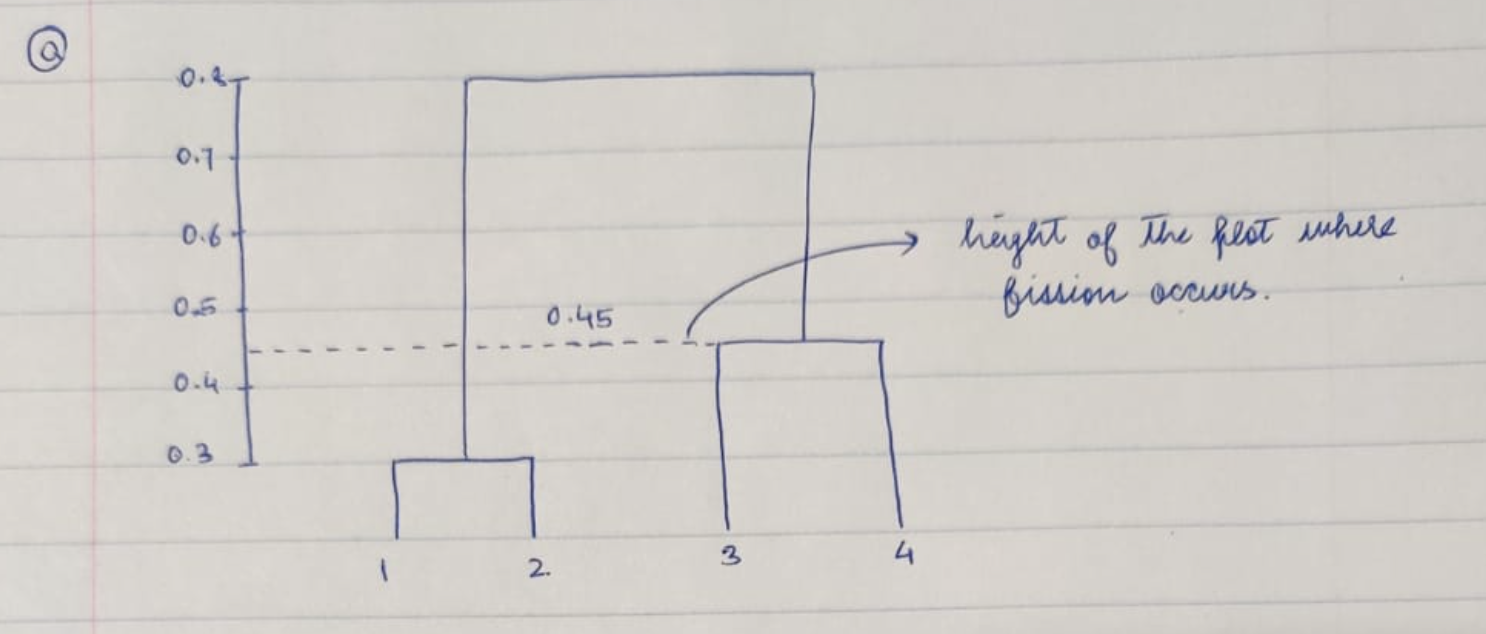

**(b). Repeat (a), this time using single linkage clustering**

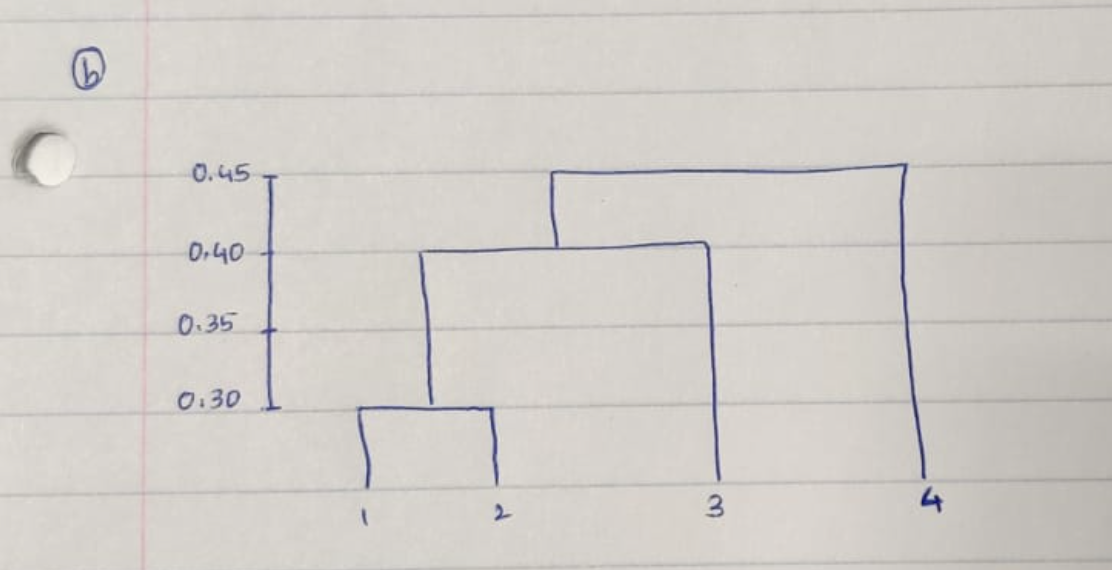

**(c). Suppose that we cut the dendogram obtained in (a) such that two clusters result. Which observations are in each cluster?**

The observations in the cluster are:

> - {1, 2}
> - {3, 4}

**(d). Suppose that we cut the dendogram obtained in (b) such that two clusters result. Which observations are in each cluster?**

The observations in the cluster are:

> - {1, 2, 3}
> - {4}

**(e). It is mentioned in the chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same**

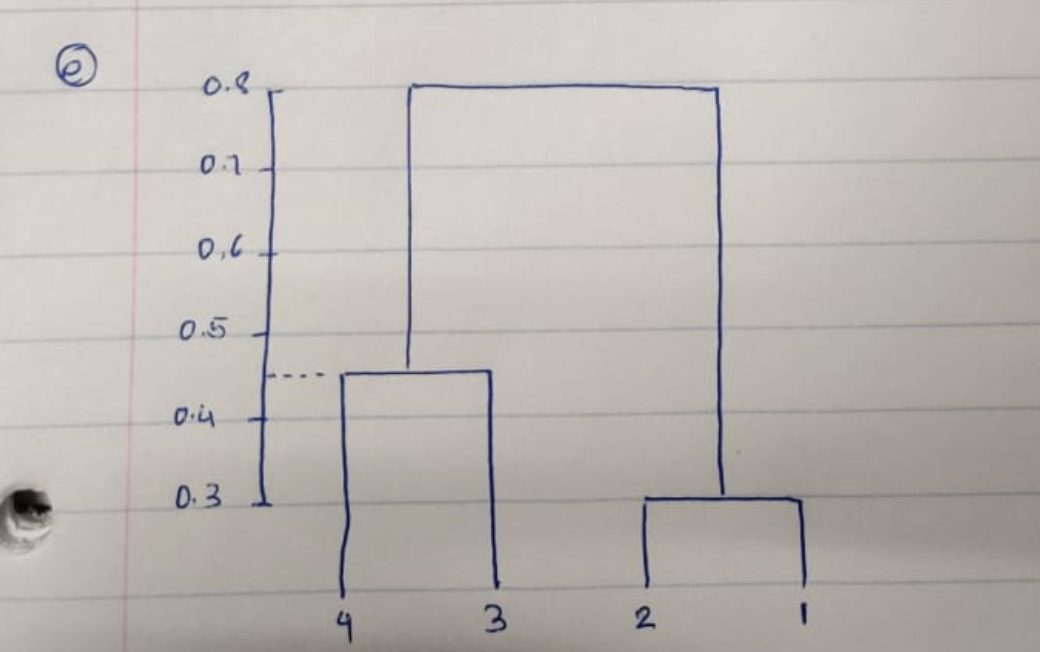

**References:**
> - https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
> - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
> - https://imbalanced-learn.org/stable/generated/imblearn.pipeline.Pipeline.html
> - https://stackoverflow.com/questions/58815016/cross-validating-with-imblearn-pipeline-and-gridsearchcv